# Definitions

* $ l \in \mathbf{N}^+ $: Number of levels.
* $ L = \{ x \  | \  x \in \mathbf{N}^+ \land x \leq l \} $: Person levels. Smaller value is higher position. $1$ is the top.
* $ p_x \  (x \in L) $. A person on $x$-level.
* $ a_{x \rightarrow P} \in \mathbf{N}^0 \  (P \subsetneq L, x \in L \setminus P)  $: An activity that $x$-level person tells info to each $P$-level person.
  * Assuming $ a_{x \rightarrow P} $ does not affect to $p_x$. Self understanding is wrong.
* $ A_t = [a_{x_1 \rightarrow P_1}, a_{x_2 \rightarrow P_2}, \ldots] \  (t = |A_t|) $: All activities to get to the state. $ A_0 = [] $.
* $ u_x^{A_t} \  (x \in L, 0 \leq u_x^{A_t} \leq 1) $: Understanding of $x$-level person after ${A_t}$ from initial state($u_x^{A_0}$).
  * $ u_y^{A_{t + 1}} \ (y \in P, A_{t + 1} = A_t + [a_{x_t \rightarrow P_t}]) = \max(u_y^{A_t}, \min(u_x^{A_t}, u_y^{A_t} + \frac{u_x^{A_t}}{\sqrt{\sum_{y \in P}|p_y|}})) $
* $ L_{term} \  (L_{term} \neq \emptyset \land L_{term} \subseteq L) $: When $ u_x^{A_t} = 1 \  (x \in L_{term}) $, it terminates.

```mermaid
graph TD
    1[p_1, has u_1]
    subgraph team1[ ]
      11[p_2, has u_2] -- t_2->{3} -->
        l11[p_3, has u_3] & l12[p_3, has u_3]
      12[p_2, has u_2] -- t_2->{3} -->
      121[p_3, has u_3] & 122[p_3, has u_3]
    end
    1 -- t_1->{2} --> 11 & 12
    1 -- t_1->{2,3} --> team1

```

# Simulations

## Top-down message to all members

It means,

* $ | p_1 | = 1 $
* For $ a_{x \rightarrow Y} $, $ Y = \{y \  | \  y \gt x\} $
* $ u_1^{A_0} = 1 $ and $ u_x^{A_0} = 0 \  (x \in L \setminus \{1\}) $
* $ a_{x \rightarrow P} $ cannot be defined.

In [31]:
from typing import Unpack, TypedDict

from pygraphviz import AGraph

type Action = [int, list[int]]


class Search:
  class Params(TypedDict):
    p: list[float]
    a: list[Action]
    u0: list[float]
    L_term: list[int]

  def __init__(self, l: int, **kwargs: Unpack[Params]):
    if l < 1:
      raise ValueError("l must be positive")

    p = kwargs["p"]
    a = kwargs["a"]
    u0 = kwargs["u0"]
    L_term = kwargs["L_term"]

    if len(p) != l:
      raise ValueError("p must have length l")
    if len(u0) != l:
      raise ValueError("a must have length u0")
    if len(L_term) > l:
      raise ValueError("L_term must have length less than or equal l")

    self.l = l
    self.p = p
    self.a = a
    self.u0 = u0
    self.L_term = L_term

    initial_state = {"u": u0, "t": 0}
    self.states = {0: initial_state}

  def search(self) -> None:
    if Search.__terminates(self.u0):
      return

  def draw(self) -> AGraph:
    g = pgv.AGraph(directed=True)

    for s in self.states.items():
      g.add_node(str(s[0]), label="u=" + str(s[1]["u"]), xlabel="t=" + str(s[1]["t"]), style="filled",
                 shape="doublecircle")

    g.layout("dot")
    return g

  @staticmethod
  def __terminates(u: list[float]) -> bool:
    return all([x >= 1 for x in u])

### $ l = 1 $
* $ L = \{1\}$
* $ L_{term} = \{1\}$

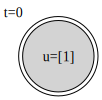

In [33]:
search = Search(1, p=[1], a=[], u0=[1], L_term=[1])
search.search()

search.draw()


### $ l = 2 \land L_{term} = \{1,2\} $
* $ L = \{1,2\} $
* $ t $
  * $ t_{1 \rightarrow \{1\}} $ does not have effect.
  * A: $ t_{1 \rightarrow \{1,2\}} = \frac{u_1}{\sqrt{|p_1| + |p_2|}} $
  * $ t_{1 \rightarrow \{2\}} $ won't happen.

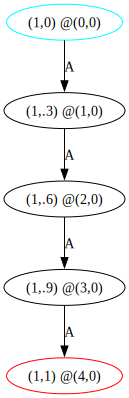

In [35]:
import pygraphviz as pgv

num_p_1 = 1
num_p_2 = 10

# TODO automate
G = pgv.AGraph(directed=True)
G.add_node("1", label="(1,0) @(0,0)", color="cyan", root=True)
G.add_node("2", label="(1,.3) @(1,0)")
G.add_node("3", label="(1,.6) @(2,0)")
G.add_node("4", label="(1,.9) @(3,0)")
G.add_node("5", label="(1,1) @(4,0)", color="red")
G.add_edge("1", "2", label="A")
G.add_edge("2", "3", label="A")
G.add_edge("3", "4", label="A")
G.add_edge("4", "5", label="A")

G.layout("dot")
G

### $ l = 3 \land L_{term} = \{1,2\} $
* $ L = \{1,2,3\} $
* $ t $
  * A: $ t_{1 \rightarrow \{2\}} = \frac{u_1}{\sqrt{|p_2|}} $
  * B: $ t_{1 \rightarrow \{2,3\}} = \frac{u_1}{\sqrt{|p_2|+|p_3|}} $

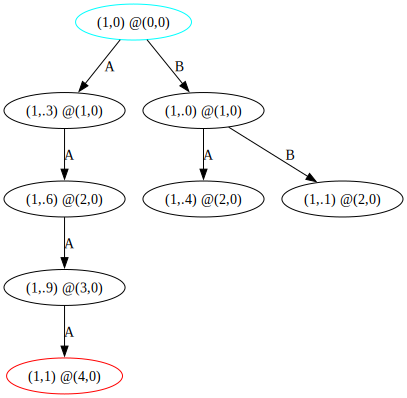

In [4]:
import pygraphviz as pgv

num_p_1 = 10
num_p_2 = 10
num_p_3 = 10 * 10

G = pgv.AGraph(directed=True)
G.add_node("1", label="(1,0) @(0,0)", color="cyan", root=True)
G.add_node("2", label="(1,.3) @(1,0)")
G.add_node("3", label="(1,.6) @(2,0)")
G.add_node("4", label="(1,.9) @(3,0)")
G.add_node("5", label="(1,1) @(4,0)", color="red")
G.add_node("6", label="(1,.0) @(1,0)")
G.add_node("7", label="(1,.4) @(2,0)")
G.add_node("8", label="(1,.1) @(2,0)")
G.add_edge("1", "2", label="A")
G.add_edge("2", "3", label="A")
G.add_edge("3", "4", label="A")
G.add_edge("4", "5", label="A")
G.add_edge("1", "6", label="B")
G.add_edge("6", "7", label="A")
G.add_edge("6", "8", label="B")
# TODO

G.layout("dot")
G